# $$ Práctica\ Final $$
##### $$ Mariana\ Lugo\ Ibarra\ y\ Miguel\ Ángel\ Reyes\ Retana$$

In [92]:
options(repr.plot.width=8, repr.plot.height=8)
library(readxl)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(stringr)

## Hipotesis de Investigación:

La motivación de la investigación resulta del trabajo realizado por el economista Raj Chetty en Estados Unidos donde se observa que existe una relación negativa entre el ingreso promedio de un barrio y el número de casos confirmados con SARS-COVID-19. 

El trabajo pretende investigar si existe una relación negativa entre defunciones, casos confirmados con SARS-COVID-19 y el ingreso promedio de un municipio.  

## Datos:

Para la investigación se obtienen los datos públicos del COVID-19 en México, datos de pobreza del CONEVAL, datos de incidencia delictiva del fuero común del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP), y datos privados y anonimizados de precios promedio de viviendas financiadas por Infonavit y el salario diario integrado promedio de acreditados del Infonavit.

El nivel de análisis es municipal.

A continuación se presentan los datos de las distintas fuentes:

$COVID-19$: 
* Se utilizan los datos diarios de los casos confirmados y defunciones reportados en https://coronavirus.gob.mx/datos/ por municipio. El corte de información es al 17 de julio de 2020.

In [93]:
confirmados <- read.csv ("Datos/COVID19/Casos_Diarios_Municipio_Confirmados_20200717.csv")
defunciones<-read.csv ("Datos/COVID19/Defunciones_20200717.csv")

In [94]:
head(confirmados)
dim(confirmados)
head(defunciones)
dim(defunciones)

cve_ent,poblacion,nombre,X12.01.2020,X13.01.2020,X14.01.2020,X15.01.2020,X16.01.2020,X17.01.2020,X18.01.2020,...,X08.07.2020,X09.07.2020,X10.07.2020,X11.07.2020,X12.07.2020,X13.07.2020,X14.07.2020,X15.07.2020,X16.07.2020,X17.07.2020
16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16049,18769,Madero,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
5035,744247,Torreon,0,0,0,0,0,0,0,...,53,67,66,12,6,21,22,22,4,0
5036,23781,Viesca,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


[1] 2457  191

cve_ent,poblacion,nombre,X17.03.2020,X18.03.2020,X19.03.2020,X20.03.2020,X21.03.2020,X22.03.2020,X23.03.2020,...,X08.07.2020,X09.07.2020,X10.07.2020,X11.07.2020,X12.07.2020,X13.07.2020,X14.07.2020,X15.07.2020,X16.07.2020,X17.07.2020
16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5035,744247,Torreon,0,0,0,0,0,0,0,...,3,2,3,2,0,2,2,1,0,0
5036,23781,Viesca,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


[1] 2457  126

Para obtener el total de casos confirmados y defunciones por municipio se suma el número de casos diarios confirmado y defunciones al 17 de julio de 2020, de acuerdo con las dimensiones de los sets de datos respectivos.

In [95]:
confirmados$total<-rowSums(confirmados[,c(4:191)])
defunciones$total<-rowSums(defunciones[,c(4:126)])

$CONEVAL$: 

Se agregan datos de pobreza para el año 2015. Los datos viene desagregados a nivel municipal y toman en cuenta los siguientes indicadores (carencias sociales) para la medición de la pobreza multidimensional: Ingreso corriente per cápita; rezago educativo; acceso a servicios de salud; acceso a seguridad social; calidad y espacios de la vivienda; acceso a servicios básicos de la vivienda; acceso a la alimentación; y grado de cohesión social. Para que una persona se considere en situación de pobreza, debe tener al menos tres carencias sociales y un ingreso por debajo de la línea de bienestar. Para este trabajo se considera el porcentaje y el número de la población en situación de pobreza para el año 2015. 

In [96]:
coneval<-read.csv("Datos/CONEVAL/Concentrado_pobreza_municipios_2015.csv")
coneval<-coneval[,c("Entidad","Nombre_ent", "cve_mun", "pob_porc_2015","pob_per_2015")]
coneval$cve_mun<- str_pad(string=as.character(coneval$cve_mun),side='left',width=5, pad="0")
names(coneval)[3]<-"CV_MUN"
head(coneval)

Entidad,Nombre_ent,CV_MUN,pob_porc_2015,pob_per_2015
01,Aguascalientes,01001,26.1,"224,949"
01,Aguascalientes,01002,54.0,"25,169"
01,Aguascalientes,01003,56.8,"29,951"
01,Aguascalientes,01004,43.2,"6,620"
01,Aguascalientes,01005,25.0,"31,479"
01,Aguascalientes,01006,34.9,"15,972"


$Secretariado\ Ejecutivo\ del\ Sistema\ Nacional\ de\ Seguridad\ Pública\ (SESNSP):$

Se descargaron los datos de Incidencia Delictiva del Fuero Común a nivel municipal con el número de delitos por mes del año 2015 a mayo del 2020 (último periodo disponible).

Se considera al los homicidios y al robo de vehículo como los delitos con menos cifra negra y, por lo tanto, los delitos asertivos de violencia.

Se construyen las tasas de homicidios y robo a vehículo por cada cien mil habitantes por año. Con el objetivo de tener una tasa del delito, y por lo tanto violencia, más robusta, se calcula una tasa promedio del año 2015 a mayo 2020.

In [97]:
d2015<-read_excel("Datos/SEGURIDAD/2015.xlsx")
d2016<-read_excel("Datos/SEGURIDAD/2016.xlsx")
d2017<-read_excel("Datos/SEGURIDAD/2017.xlsx")
d2018<-read_excel("Datos/SEGURIDAD/2018.xlsx")
d2019<-read_excel("Datos/SEGURIDAD/2019.xlsx")
d052020<-read_excel("Datos/SEGURIDAD/2020.xlsx")

Se construyen los delitos totales por año:

In [98]:
d2015$total<-rowSums(d2015[,c(10:21)])
d2016$total<-rowSums(d2016[,c(10:21)])
d2017$total<-rowSums(d2017[,c(10:21)])
d2018$total<-rowSums(d2018[,c(10:21)])
d2019$total<-rowSums(d2019[,c(10:21)])
d052020$total<-rowSums(d052020[,c(10:14)])

Se calcula el número de homicidios y robo a vehículo por municipio por cada año. 

In [99]:
d2015_h<-d2015%>% group_by(`Cve. Municipio`) %>% filter(`Tipo de delito`=="Homicidio") %>% summarise (total_h=sum(total))
d2016_h<-d2016%>% group_by(`Cve. Municipio`) %>% filter(`Tipo de delito`=="Homicidio") %>% summarise (total_h=sum(total))
d2017_h<-d2017%>% group_by(`Cve. Municipio`) %>% filter(`Tipo de delito`=="Homicidio") %>% summarise (total_h=sum(total))
d2018_h<-d2018%>% group_by(`Cve. Municipio`) %>% filter(`Tipo de delito`=="Homicidio") %>% summarise (total_h=sum(total))
d2019_h<-d2019%>% group_by(`Cve. Municipio`) %>% filter(`Tipo de delito`=="Homicidio") %>% summarise (total_h=sum(total))
d052020_h<-d052020%>% group_by(`Cve. Municipio`) %>% filter(`Tipo de delito`=="Homicidio") %>% summarise (total_h=sum(total))

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


In [100]:
d2015_r<-d2015%>% group_by(`Cve. Municipio`) %>% filter(`Subtipo de delito`=="Robo de vehículo automotor") %>% summarise (total_r=sum(total))
d2016_r<-d2016%>% group_by(`Cve. Municipio`) %>% filter(`Subtipo de delito`=="Robo de vehículo automotor") %>% summarise (total_r=sum(total))
d2017_r<-d2017%>% group_by(`Cve. Municipio`) %>% filter(`Subtipo de delito`=="Robo de vehículo automotor") %>% summarise (total_r=sum(total))
d2018_r<-d2018%>% group_by(`Cve. Municipio`) %>% filter(`Subtipo de delito`=="Robo de vehículo automotor") %>% summarise (total_r=sum(total))
d2019_r<-d2019%>% group_by(`Cve. Municipio`) %>% filter(`Subtipo de delito`=="Robo de vehículo automotor") %>% summarise (total_r=sum(total))
d052020_r<-d052020%>% group_by(`Cve. Municipio`) %>% filter(`Subtipo de delito`=="Robo de vehículo automotor") %>% summarise (total_r=sum(total))

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


$Infonavit$: 

* Se utiliza la información del precio promedio de las viviendas a nivel municipal y salario diario integrado promedio de los acreditados por municipio con el objetivo de establecer municipios "ricos" y "pobres" y su relación con la información del COVID-19. 
* Los set de datos contienen la clave del muncipio donde se financió vivienda, el precio promedio por municipio, el salario diario integrado de los acreditados promedio por municipio, la proporción de créditos originados por año en cada municipio y el año de originación.*

In [101]:
INF10<-read_excel("Datos/INFONAVIT/INFV2010.xlsx")
INF11<-read_excel("Datos/INFONAVIT/INFV2011.xlsx")
INF12<-read_excel("Datos/INFONAVIT/INFV2012.xlsx")
INF13<-read_excel("Datos/INFONAVIT/INFV2013.xlsx")
INF14<-read_excel("Datos/INFONAVIT/INFV2014.xlsx")
INF15<-read_excel("Datos/INFONAVIT/INFV2015.xlsx")
INF16<-read_excel("Datos/INFONAVIT/INFV2016.xlsx")
INF17<-read_excel("Datos/INFONAVIT/INFV2017.xlsx")
INF18<-read_excel("Datos/INFONAVIT/INFV2018.xlsx")
INF19<-read_excel("Datos/INFONAVIT/INFV2019.xlsx")
INF0620<-read_excel("Datos/INFONAVIT/INFV062020.xlsx")

In [102]:
infonavit<-rbind(INF10,INF11, INF12,INF13,INF14,INF15,INF16,INF17,INF18,INF19,INF0620)
head(infonavit)

CV_MUN,PRECIO_PROM,SDI_PROM,PC_CRED,YEAR
01001,332299.2,4.852961,1.220829e-02,2010
01002,308960.0,6.135259,2.159995e-05,2010
01003,244566.1,2.902301,6.911985e-05,2010
01004,353464.8,4.365375,4.967989e-05,2010
01005,422150.7,6.617866,2.246395e-03,2010
01006,284349.8,4.151593,1.360797e-04,2010


In [103]:
df_inf<-infonavit %>% group_by(CV_MUN) %>% summarise(precio_mean=mean(PRECIO_PROM),
                                                    salario_mean=mean(SDI_PROM))
head(df_inf)

`summarise()` ungrouping output (override with `.groups` argument)


CV_MUN,precio_mean,salario_mean
01001,450371.7,4.767035
01002,351536.1,3.952249
01003,418039.4,3.360099
01004,368355.9,3.782037
01005,672823.9,7.371576
01006,388481.6,4.334164


Del 2010 al primer semestre del 2020 el Infonavit ha financiado viviendas en 1517 municipios.

In [104]:
dim(df_inf)

[1] 1517    3

**Se construye la base de datos para análisis:**

Se homologa las claves de municipio y nombre del campo para todos los sets de datos:

In [105]:
confirmados$cve_ent<- str_pad(string=as.character(confirmados$cve_ent),side='left',width=5, pad="0")
defunciones$cve_ent<- str_pad(string=as.character(defunciones$cve_ent),side='left',width=5, pad="0")

In [106]:
d2015_h$`Cve. Municipio`<-str_pad(string=as.character(d2015_h$`Cve. Municipio`),side='left',width=5, pad="0")
d2016_h$`Cve. Municipio`<-str_pad(string=as.character(d2016_h$`Cve. Municipio`),side='left',width=5, pad="0")
d2017_h$`Cve. Municipio`<-str_pad(string=as.character(d2017_h$`Cve. Municipio`),side='left',width=5, pad="0")
d2018_h$`Cve. Municipio`<-str_pad(string=as.character(d2018_h$`Cve. Municipio`),side='left',width=5, pad="0")
d2019_h$`Cve. Municipio`<-str_pad(string=as.character(d2019_h$`Cve. Municipio`),side='left',width=5, pad="0")
d052020_h$`Cve. Municipio`<-str_pad(string=as.character(d052020_h$`Cve. Municipio`),side='left',width=5, pad="0")

In [107]:
d2015_r$`Cve. Municipio`<-str_pad(string=as.character(d2015_r$`Cve. Municipio`),side='left',width=5, pad="0")
d2016_r$`Cve. Municipio`<-str_pad(string=as.character(d2016_r$`Cve. Municipio`),side='left',width=5, pad="0")
d2017_r$`Cve. Municipio`<-str_pad(string=as.character(d2017_r$`Cve. Municipio`),side='left',width=5, pad="0")
d2018_r$`Cve. Municipio`<-str_pad(string=as.character(d2018_r$`Cve. Municipio`),side='left',width=5, pad="0")
d2019_r$`Cve. Municipio`<-str_pad(string=as.character(d2019_r$`Cve. Municipio`),side='left',width=5, pad="0")
d052020_r$`Cve. Municipio`<-str_pad(string=as.character(d052020_r$`Cve. Municipio`),side='left',width=5, pad="0")

In [108]:
names(confirmados)[1]<-"CV_MUN"
names(defunciones)[1]<-"CV_MUN"
names(d2015_h)[1]<-"CV_MUN"
names(d2016_h)[1]<-"CV_MUN"
names(d2017_h)[1]<-"CV_MUN"
names(d2018_h)[1]<-"CV_MUN"
names(d2019_h)[1]<-"CV_MUN"
names(d052020_h)[1]<-"CV_MUN"
names(d2015_r)[1]<-"CV_MUN"
names(d2016_r)[1]<-"CV_MUN"
names(d2017_r)[1]<-"CV_MUN"
names(d2018_r)[1]<-"CV_MUN"
names(d2019_r)[1]<-"CV_MUN"
names(d052020_r)[1]<-"CV_MUN"

Nos quedamos solo con los casos confirmados totales y defunciones totales por municipio:

In [109]:
confirmados<-confirmados[,c(1:3,192)]
defunciones<-defunciones[,c(1,127)]

In [110]:
datos<-left_join(df_inf, confirmados, by="CV_MUN")
datos<-left_join(datos, defunciones, by="CV_MUN")

In [111]:
names(datos)[6]<-"confirmados_total"
names(datos)[7]<-"defunciones_total"
head(datos)
dim(datos)

CV_MUN,precio_mean,salario_mean,poblacion,nombre,confirmados_total,defunciones_total
01001,450371.7,4.767035,961977,Aguascalientes,2465,173
01002,351536.1,3.952249,50864,Asientos,48,5
01003,418039.4,3.360099,60760,Calvillo,84,1
01004,368355.9,3.782037,16918,Cosio,49,0
01005,672823.9,7.371576,130184,Jesus Maria,104,2
01006,388481.6,4.334164,50032,Pabellon de Arteaga,113,6


[1] 1517    7

Construimos la tasa promedio de los delitos por cada cien mil habitantes:

In [112]:
poblacion<-datos[,c(1,4)]

In [113]:
d2015_h<-left_join(poblacion, d2015_h, by="CV_MUN")
d2015_h<-d2015_h %>% mutate(ts_15_h=(total_h/poblacion)*100000)

d2016_h<-left_join(poblacion, d2016_h, by="CV_MUN")
d2016_h<-d2016_h %>% mutate(ts_16_h=(total_h/poblacion)*100000)

d2017_h<-left_join(poblacion, d2017_h, by="CV_MUN")
d2017_h<-d2017_h %>% mutate(ts_17_h=(total_h/poblacion)*100000)

d2018_h<-left_join(poblacion, d2018_h, by="CV_MUN")
d2018_h<-d2018_h %>% mutate(ts_18_h=(total_h/poblacion)*100000)

d2019_h<-left_join(poblacion, d2019_h, by="CV_MUN")
d2019_h<-d2019_h %>% mutate(ts_19_h=(total_h/poblacion)*100000)

d052020_h<-left_join(poblacion, d052020_h, by="CV_MUN")
d052020_h<-d052020_h %>% mutate(ts_20_h=(total_h/poblacion)*100000)

In [114]:
d2015_r<-left_join(poblacion, d2015_r, by="CV_MUN")
d2015_r<-d2015_r %>% mutate(ts_15_r=(total_r/poblacion)*100000)

d2016_r<-left_join(poblacion, d2016_r, by="CV_MUN")
d2016_r<-d2016_r %>% mutate(ts_16_r=(total_r/poblacion)*100000)

d2017_r<-left_join(poblacion, d2017_r, by="CV_MUN")
d2017_r<-d2017_r %>% mutate(ts_17_r=(total_r/poblacion)*100000)

d2018_r<-left_join(poblacion, d2018_r, by="CV_MUN")
d2018_r<-d2018_r %>% mutate(ts_18_r=(total_r/poblacion)*100000)

d2019_r<-left_join(poblacion, d2019_r, by="CV_MUN")
d2019_r<-d2019_r %>% mutate(ts_19_r=(total_r/poblacion)*100000)

d052020_r<-left_join(poblacion, d052020_r, by="CV_MUN")
d052020_r<-d052020_r %>% mutate(ts_20_r=(total_r/poblacion)*100000)

In [115]:
delitos<-left_join(d2015_h,d2016_h,by="CV_MUN")
delitos<-left_join(delitos,d2017_h,by="CV_MUN")
delitos<-left_join(delitos,d2018_h,by="CV_MUN")
delitos<-left_join(delitos,d2019_h,by="CV_MUN")
delitos<-left_join(delitos,d052020_h,by="CV_MUN")
delitos<-left_join(delitos,d2015_r,by="CV_MUN")
delitos<-left_join(delitos,d2016_r,by="CV_MUN")
delitos<-left_join(delitos,d2017_r,by="CV_MUN")
delitos<-left_join(delitos,d2018_r,by="CV_MUN")
delitos<-left_join(delitos,d2019_r,by="CV_MUN")
delitos<-left_join(delitos,d052020_r,by="CV_MUN")

ts_homicidios<-delitos[,c("CV_MUN","ts_15_h","ts_16_h","ts_17_h","ts_18_h","ts_19_h","ts_20_h")]
ts_homicidios$ts_promedio_h<-rowMeans(ts_homicidios[,c(2:7)])
ts_robos<-delitos[,c("CV_MUN","ts_15_r","ts_16_r","ts_17_r","ts_18_r","ts_19_r","ts_20_r")]
ts_robos$ts_promedio_r<-rowMeans(ts_robos[,c(2:7)])

ts_homicidio_promedio<-ts_homicidios[,c(1,8)]
ts_robo_promedio<-ts_robos[,c(1,8)]

In [116]:
datos<-left_join(datos, ts_homicidio_promedio, by="CV_MUN")
datos<-left_join(datos, ts_robo_promedio, by="CV_MUN")

Por último, se une la información de pobreza de CONEVAL:

In [117]:
datos<-left_join(datos, coneval, by="CV_MUN")
head(datos)

CV_MUN,precio_mean,salario_mean,poblacion,nombre,confirmados_total,defunciones_total,ts_promedio_h,ts_promedio_r,Entidad,Nombre_ent,pob_porc_2015,pob_per_2015
01001,450371.7,4.767035,961977,Aguascalientes,2465,173,13.99895,225.47317,01,Aguascalientes,26.1,"224,949"
01002,351536.1,3.952249,50864,Asientos,48,5,22.60931,35.06082,01,Aguascalientes,54.0,"25,169"
01003,418039.4,3.360099,60760,Calvillo,84,1,17.55541,58.42660,01,Aguascalientes,56.8,"29,951"
01004,368355.9,3.782037,16918,Cosio,49,0,20.68802,45.31663,01,Aguascalientes,43.2,"6,620"
01005,672823.9,7.371576,130184,Jesus Maria,104,2,16.38706,114.83746,01,Aguascalientes,25.0,"31,479"
01006,388481.6,4.334164,50032,Pabellon de Arteaga,113,6,17.32225,54.96482,01,Aguascalientes,34.9,"15,972"


In [118]:
dim(datos)

[1] 1517   13

In [119]:
#Estadística descriptiva
summary (datos)

    CV_MUN           precio_mean       salario_mean      poblacion      
 Length:1517        Min.   : 116583   Min.   : 1.003   Min.   :    679  
 Class :character   1st Qu.: 369851   1st Qu.: 4.085   1st Qu.:  12013  
 Mode  :character   Median : 450000   Median : 5.728   Median :  25266  
                    Mean   : 521435   Mean   : 6.508   Mean   :  79199  
                    3rd Qu.: 573333   3rd Qu.: 7.912   3rd Qu.:  60898  
                    Max.   :3184562   Max.   :25.000   Max.   :1815551  
                                                       NA's   :1        
             nombre     confirmados_total  defunciones_total ts_promedio_h   
 Benito Juarez  :   6   Min.   :    0.00   Min.   :   0.00   Min.   :  0.00  
 Emiliano Zapata:   5   1st Qu.:    7.00   1st Qu.:   1.00   1st Qu.: 12.43  
 Juarez         :   5   Median :   22.00   Median :   3.00   Median : 21.35  
 Ocampo         :   5   Mean   :  216.12   Mean   :  24.94   Mean   : 27.57  
 Abasolo        :   4   3r

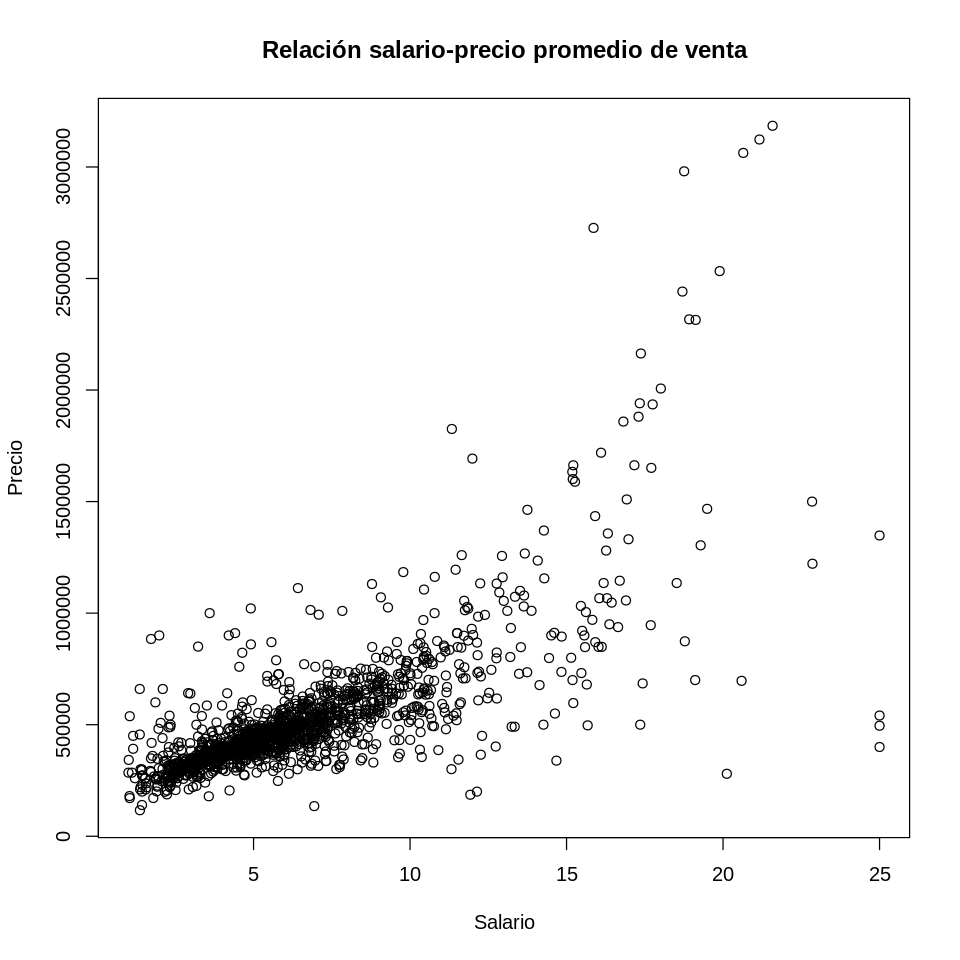

In [31]:
#Relación salario y precio de casa
plot(datos$salario_mean, datos$precio_mean, main="Relación salario-precio promedio de venta",
     xlab="Salario", ylab="Precio")

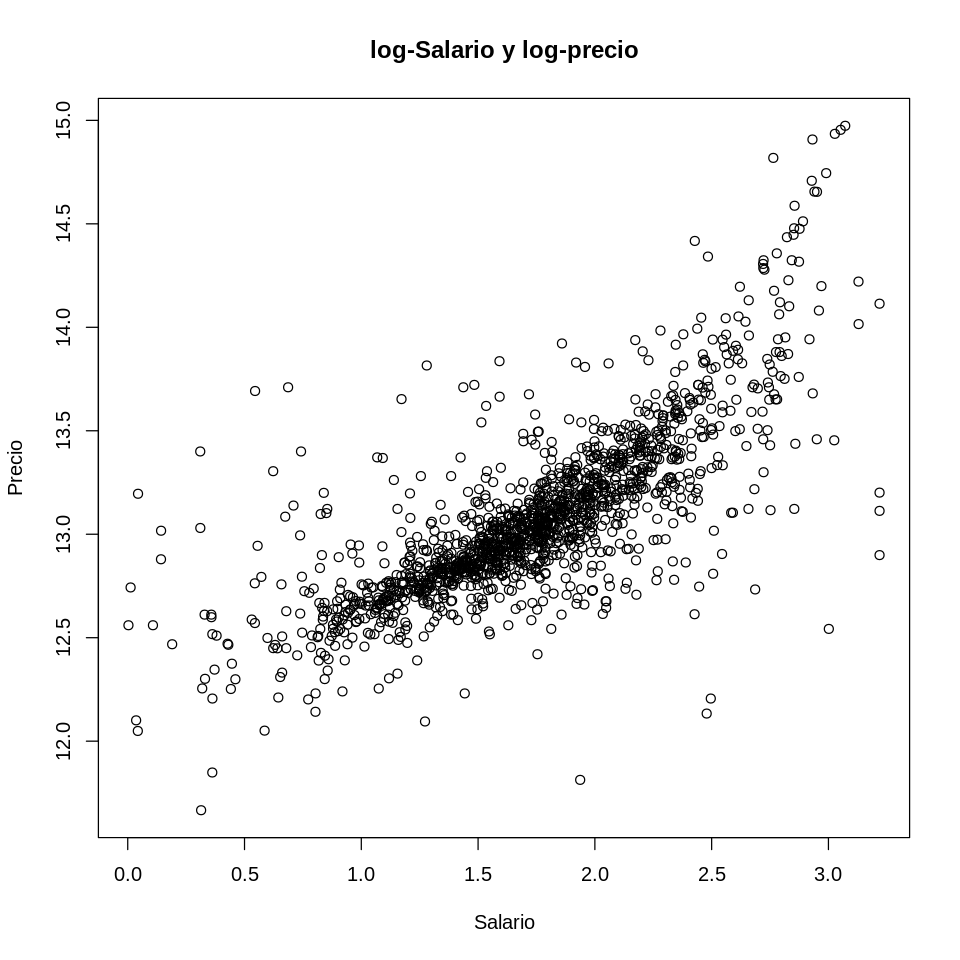

In [32]:
#Con logaritmo al salario y al precio
plot(log(datos$salario_mean), log(datos$precio_mean), main="log-Salario y log-precio",
     xlab="Salario", ylab="Precio")

In [33]:
#Correlación entre el salario y el préstamo obtenido para la vivienda
cor(x=datos$salario_mean, y=datos$precio_mean)

[1] 0.7405319

Warning message:
“Removed 1 rows containing missing values (geom_point).”

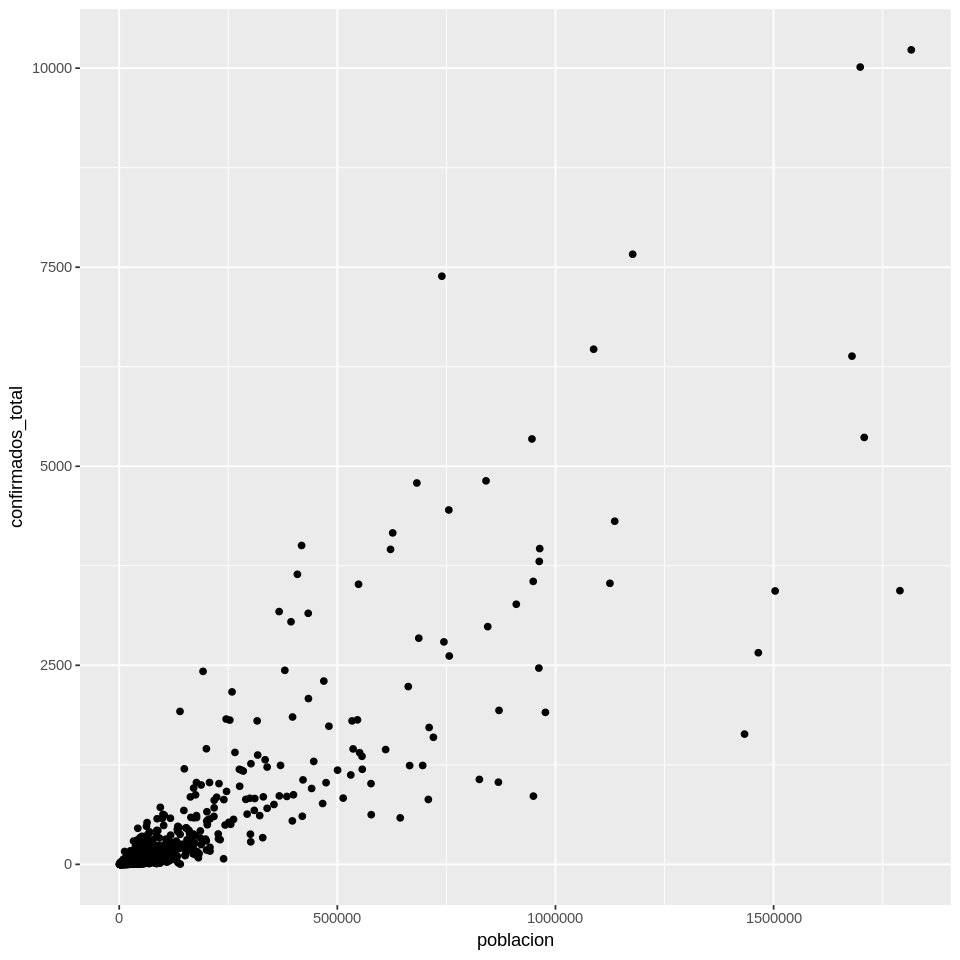

In [34]:
#Relación entre población y casos confirmados
ggplot(data=datos, aes(x=poblacion, y=confirmados_total)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”

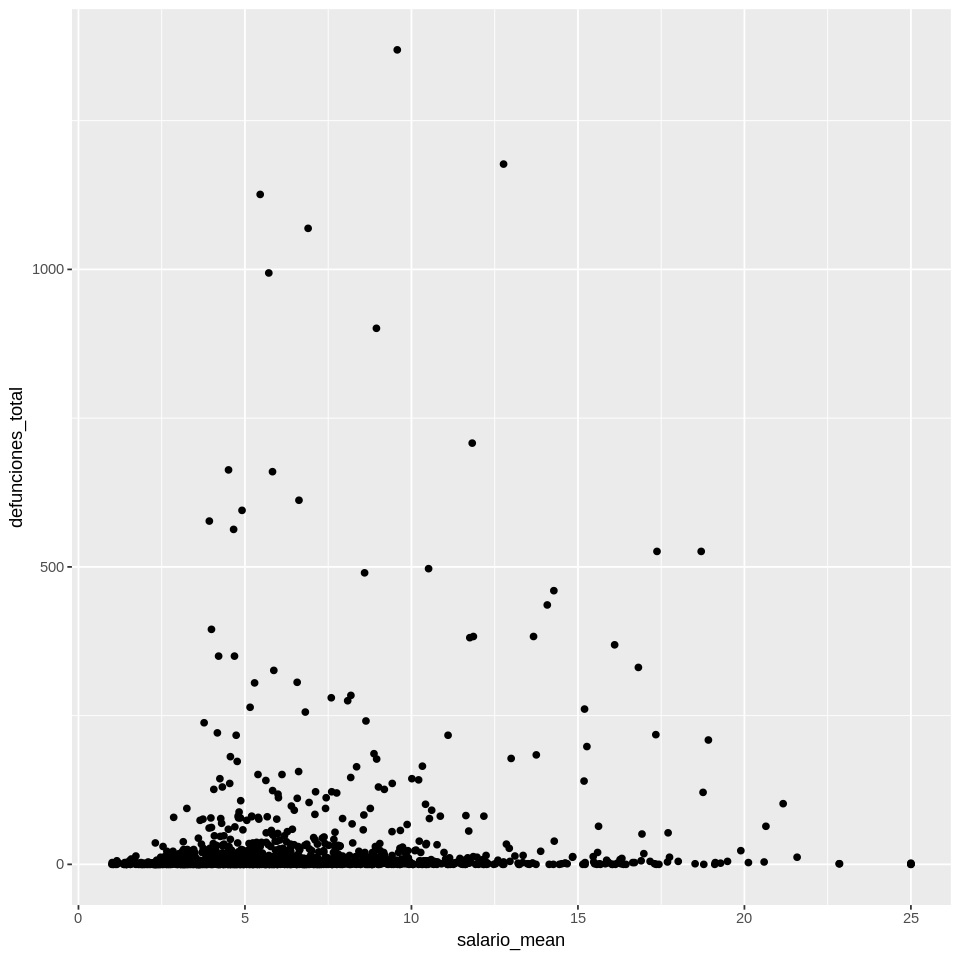

In [36]:
#Sin relación entre salario y defunciones
ggplot(data=datos, aes(x=salario_mean, y=defunciones_total)) + geom_point()

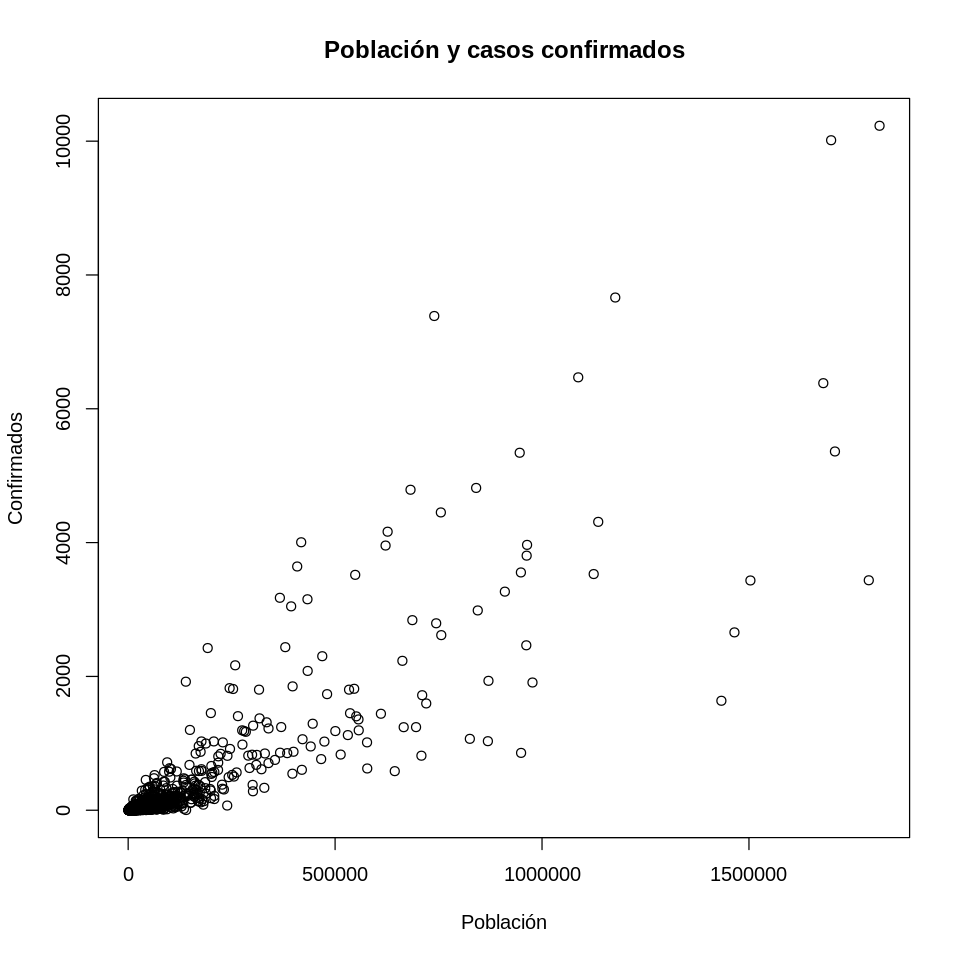

In [38]:
#Relación población y confirmados
plot(datos$poblacion, datos$confirmados_total, main="Población y casos confirmados",
     xlab="Población", ylab="Confirmados")

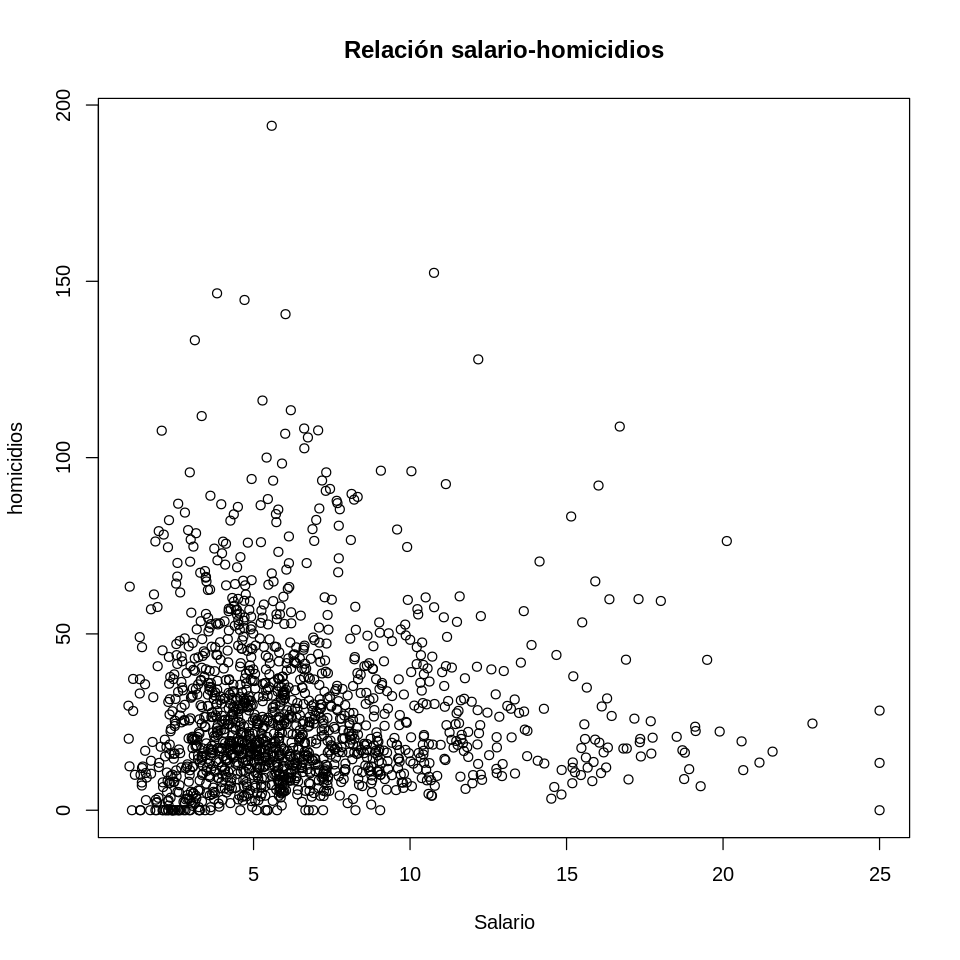

In [120]:
#Relación salario y homicidios
plot(datos$salario_mean, datos$ts_promedio_h, main="Relación salario-homicidios",
     xlab="Salario", ylab="homicidios")

In [121]:
#Correlación entre el salario y homicidios
cor(x=datos$salario_mean, y=datos$ts_promedio_h)

[1] NA

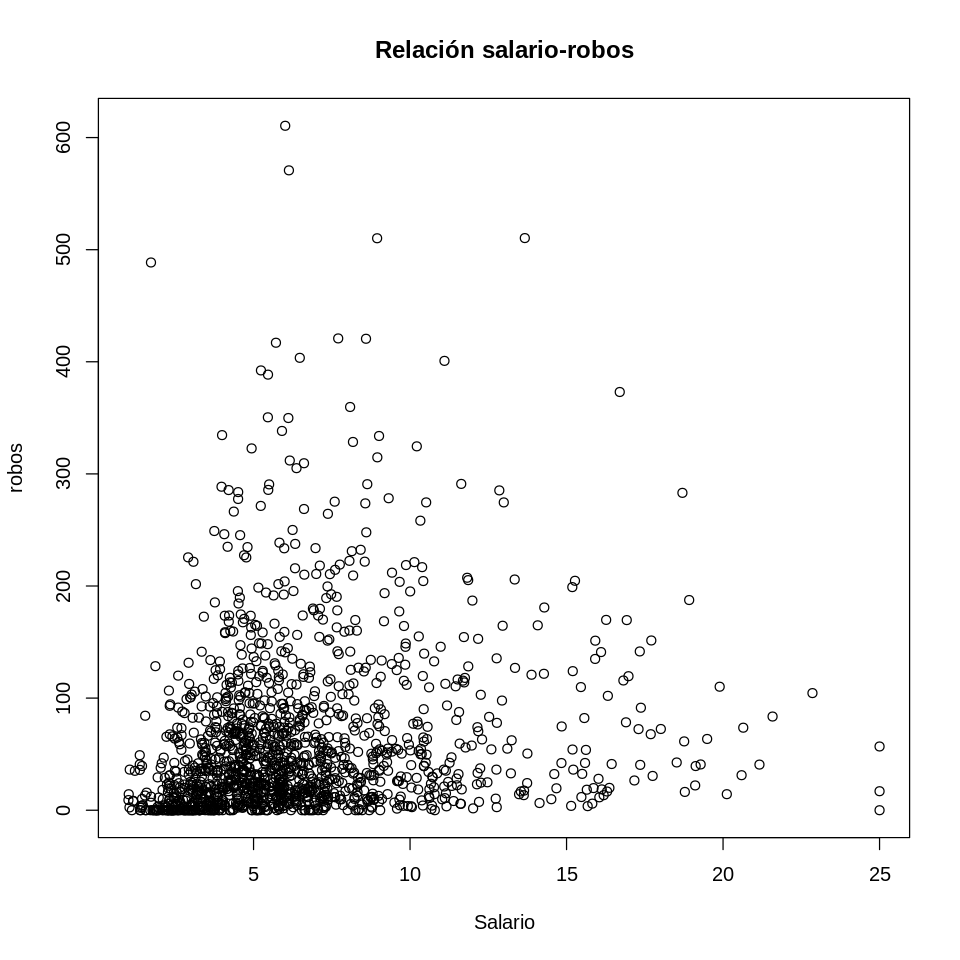

In [122]:
#Relación salario y robos
plot(datos$salario_mean, datos$ts_promedio_r, main="Relación salario-robos",
     xlab="Salario", ylab="robos")

In [123]:
#Correlación entre el salario y robos
cor(x=datos$salario_mean, y=datos$ts_promedio_r)

[1] NA

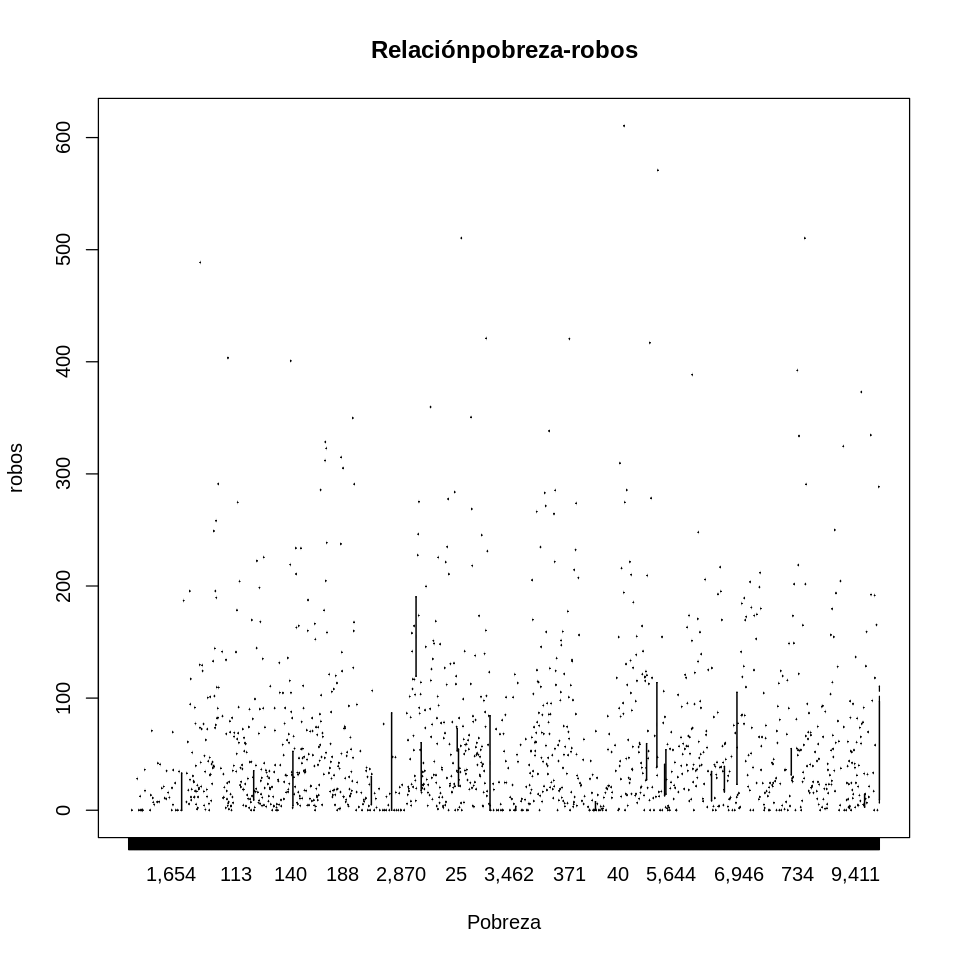

In [125]:
#Relación salario y robos
plot(datos$pob_per_2015, datos$ts_promedio_r, main="Relaciónpobreza-robos",
     xlab="Pobreza", ylab="robos")

In [179]:
datos$pob_per_2015 <- as.factor(datos$pob_per_2015)  

(datos)

CV_MUN,precio_mean,salario_mean,poblacion,nombre,confirmados_total,defunciones_total,ts_promedio_h,ts_promedio_r,Entidad,Nombre_ent,pob_porc_2015,pob_per_2015
01001,450371.7,4.767035,961977,Aguascalientes,2465,173,13.998949,225.473166,01,Aguascalientes,26.1,"224,949"
01002,351536.1,3.952249,50864,Asientos,48,5,22.609311,35.060816,01,Aguascalientes,54.0,"25,169"
01003,418039.4,3.360099,60760,Calvillo,84,1,17.555409,58.426596,01,Aguascalientes,56.8,"29,951"
01004,368355.9,3.782037,16918,Cosio,49,0,20.688025,45.316625,01,Aguascalientes,43.2,"6,620"
01005,672823.9,7.371576,130184,Jesus Maria,104,2,16.387062,114.837461,01,Aguascalientes,25.0,"31,479"
01006,388481.6,4.334164,50032,Pabellon de Arteaga,113,6,17.322247,54.964823,01,Aguascalientes,34.9,"15,972"
01007,395431.2,4.317899,57981,Rincon de Romos,211,5,21.271336,82.210839,01,Aguascalientes,50.1,"25,483"
01008,884000.0,1.725000,9661,San Jose de Gracia,30,0,10.350895,12.076045,01,Aguascalientes,59.6,"5,228"
01009,389269.7,3.344752,22743,Tepezala,83,1,15.389351,19.786308,01,Aguascalientes,50.7,"10,378"
01010,453000.0,4.769737,21947,El Llano,9,1,34.173236,39.489072,01,Aguascalientes,55.1,"10,988"


In [180]:
#Precio salario y población
df1<- aggregate(datos[2:9], by=list(datos$Entidad), FUN=mean) 
head (df1)

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”Warning message in mean.default(X[[i]], 

Group.1,precio_mean,salario_mean,poblacion,nombre,confirmados_total,defunciones_total,ts_promedio_h,ts_promedio_r
01,463364.4,4.059028,130421.36,NA,294.0000,18.09091,19.10066,74.471207
02,522955.3,6.200239,726973.60,NA,2353.0000,468.80000,63.41297,429.737444
03,503060.0,6.394732,160941.60,NA,574.6000,23.40000,26.93782,99.640831
04,486973.0,5.823687,90965.18,NA,301.9091,29.72727,14.47542,22.876327
05,401096.1,4.897344,84703.16,NA,221.7895,11.52632,17.10878,8.698068
06,411750.3,4.588716,78515.30,NA,110.2000,12.20000,69.05382,87.268348


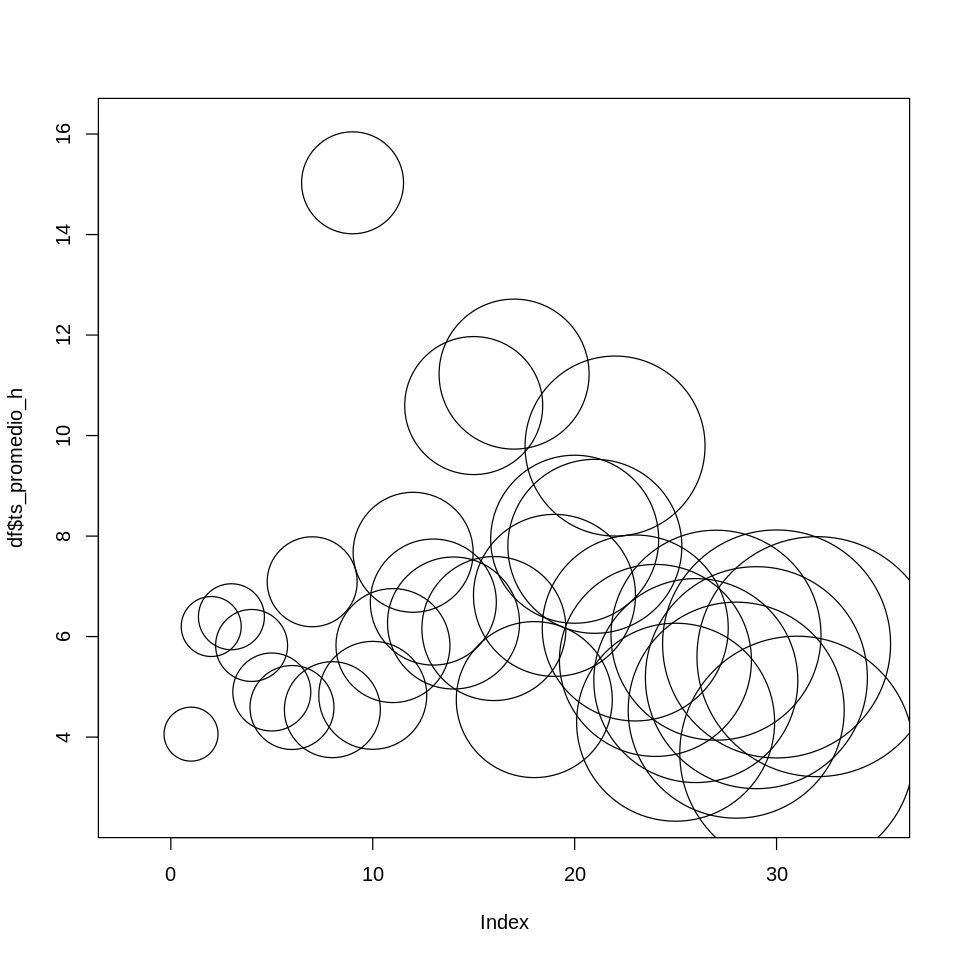

In [181]:
symbols (df$salario_mean, df$ts_promedio_h, circles=df$Group.1)

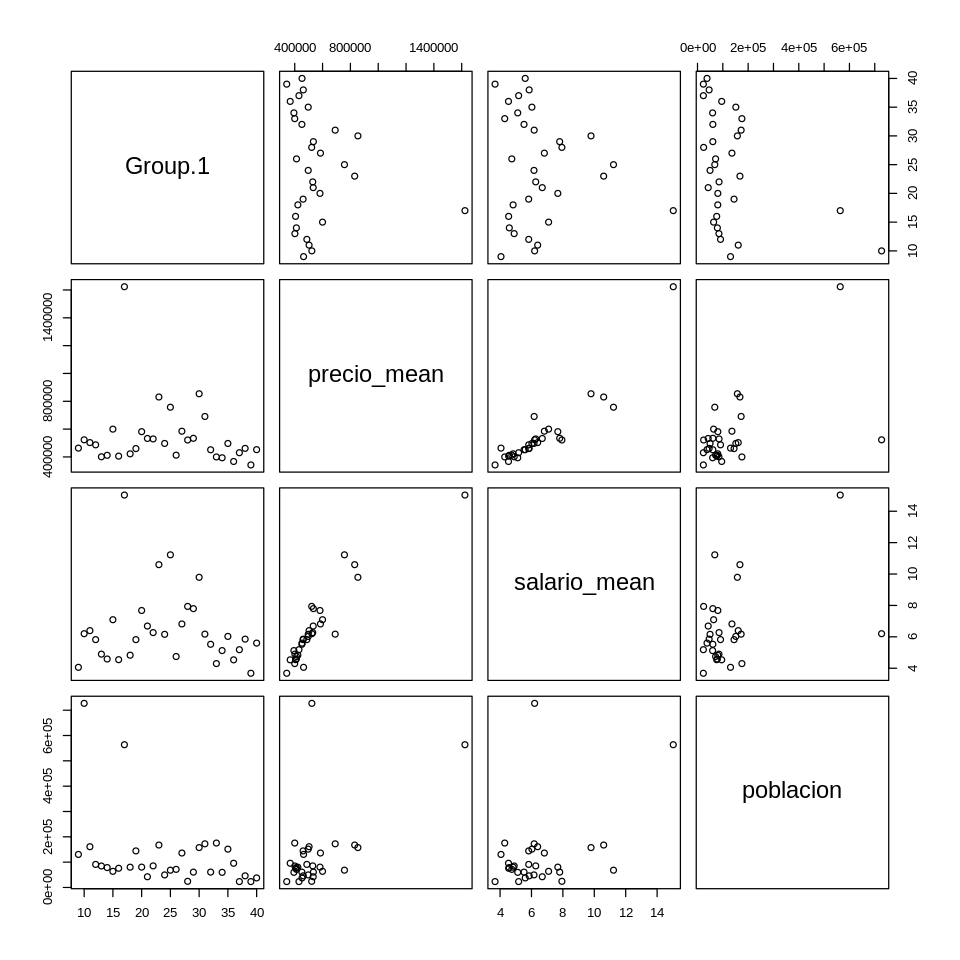

In [182]:
plot(df)

In [183]:
str (df1)

'data.frame':	32 obs. of  9 variables:
 $ Group.1          : Factor w/ 42 levels "","               Algunas cifras pueden variar por cuestiones de redondeo.",..: 9 10 11 12 13 14 15 16 17 18 ...
 $ precio_mean      : num  463364 522955 503060 486973 401096 ...
 $ salario_mean     : num  4.06 6.2 6.39 5.82 4.9 ...
 $ poblacion        : num  130421 726974 160942 90965 84703 ...
 $ nombre           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ confirmados_total: num  294 2353 575 302 222 ...
 $ defunciones_total: num  18.1 468.8 23.4 29.7 11.5 ...
 $ ts_promedio_h    : num  19.1 63.4 26.9 14.5 17.1 ...
 $ ts_promedio_r    : num  74.5 429.7 99.6 22.9 8.7 ...
